### Download and combine all data. Apply various algorithms for predictions
This notebook is used for checking how well the six different classifier algorithms would have predicted next day's stock price movemements in the 8 chosen stocks.

The follwoing is done for each stock/cashtag separately. Then the outcome shown as six graphs, one for each classifier, is shown and saved as an image file to be presented in an article, or alike.

First, a dataframe containing the combined stock and tweet data is downloaded

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import xlsxwriter

### Reading only one excel at a time; this is the data the models are tested against

In [2]:
xls = pd.ExcelFile('C:/Users/jangn/OneDrive/CODE/Stock_markets/Prediction_data_Spring_2019/$AAL_prediction.xlsx') # Update cashtag!
Spring2019 = pd.read_excel(xls, header = 0,encoding='latin-1')

In [3]:
Spring2019.tail(14)

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell
2019-03-15,32.349998,31.420000,32.279999,31.430000,-2.633205,4002.475410,0.232066,0.047541,0.846262,0.106180,-571.878784,-1.882455,-1.0
2019-03-16,32.093332,31.290000,32.019999,31.413333,-1.882455,1587.333333,0.259539,0.042778,0.815000,0.142222,601.459044,-1.131705,-1.0
2019-03-17,31.836666,31.160000,31.760000,31.396666,-1.131705,824.615385,0.219554,0.061154,0.825846,0.113000,81.045608,-0.380955,-1.0
2019-03-18,31.580000,31.030001,31.500000,31.379999,-0.380955,11031.893639,0.171607,0.065358,0.821524,0.113131,4030.680298,0.285715,1.0
2019-03-19,32.119999,31.379999,31.500000,31.590000,0.285715,1824.300000,0.155815,0.059550,0.804050,0.136400,551.926725,-1.714289,-1.0
2019-03-20,31.549999,30.770000,31.500000,30.959999,-1.714289,11407.000000,0.270644,0.040125,0.798250,0.161625,6926.773819,1.812889,1.0
2019-03-21,31.770000,30.790001,30.889999,31.450001,1.812889,15514.461538,0.412185,0.014231,0.838385,0.147385,9229.666808,-2.394636,-1.0
2019-03-22,31.440001,30.530001,31.320000,30.570000,-2.394636,13077.428571,0.073005,0.079048,0.829571,0.091429,4761.821548,-1.945809,-1.0
2019-03-23,31.200000,30.406667,31.056667,30.449999,-1.945809,54000.300000,0.293590,0.030800,0.838300,0.131000,23649.090490,-1.496982,-1.0
2019-03-24,30.960000,30.283333,30.793334,30.329999,-1.496982,5097.615385,0.048138,0.081231,0.845846,0.072923,-774.460854,-1.048155,-1.0


### Replace zeros in the Buy/Sell- column with minus ones (-1)
The minus ones make the calculations of gain or loss easier (and more logical?), than trying to use zeros from the original version.

In [4]:
Spring2019['Buy/Sell'] = Spring2019['Buy/Sell'].replace(0, -1)

### Checking for NaN in the last row...

In [5]:
nan_rows = Spring2019[Spring2019['Predicted_change'].isnull()]
nan_rows

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell
2019-03-28,31.370001,30.440001,31.01,30.9,-0.354726,7413.473684,0.298808,0.065605,0.799079,0.135263,3184.396013,NaN,NaN


### ...then removing the last row, since its 'Predicted_change' is NaN
In other words, since this is the last row/day, there is no data from a following day to use for a prediction.

In [6]:
# Remove the last row for each cashtag, since its 'Predicted_change' is NaN
Spring2019 = Spring2019[np.isfinite(Spring2019['Predicted_change'])]
Spring2019 = Spring2019[np.isfinite(Spring2019['Buy/Sell'])]

In [7]:
Spring2019.tail()

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell
2019-03-23,31.200000,30.406667,31.056667,30.449999,-1.945809,54000.300000,0.293590,0.030800,0.838300,0.131000,23649.090490,-1.496982,-1.0
2019-03-24,30.960000,30.283333,30.793334,30.329999,-1.496982,5097.615385,0.048138,0.081231,0.845846,0.072923,-774.460854,-1.048155,-1.0
2019-03-25,30.719999,30.160000,30.530001,30.209999,-1.048155,6812.970588,0.202871,0.050912,0.831971,0.117088,395.799526,-0.983288,-1.0
2019-03-26,30.620001,29.969999,30.510000,30.209999,-0.983288,13870.171429,0.017854,0.080600,0.839771,0.079629,3391.438680,2.213413,1.0
2019-03-27,31.200001,30.150000,30.270000,30.940001,2.213413,10882.428571,0.286906,0.048400,0.818229,0.133371,4553.928774,-0.354726,-1.0


In [8]:
Spring2019.describe()

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,32.732069,31.809310,32.439655,32.116896,-0.955412,11156.666741,0.167221,0.065350,0.822298,0.112368,4059.862514,-0.927536,-0.310345
std,1.704166,1.520185,1.735428,1.546593,1.643896,12053.204792,0.113932,0.026239,0.028760,0.027381,7019.385685,1.647099,0.967451
min,30.620001,29.969999,30.270000,30.209999,-3.945320,824.615385,-0.015900,0.014231,0.714500,0.069097,-10022.823087,-3.945320,-1.000000
25%,31.580000,30.790001,31.320000,30.959999,-2.350865,4048.149533,0.073005,0.048400,0.815000,0.091429,196.036746,-2.350865,-1.000000
50%,32.169999,31.379999,31.813333,31.840000,-1.163118,9859.388889,0.171607,0.062150,0.831971,0.113000,3624.624743,-1.131705,-1.000000
75%,33.419998,32.520000,33.220001,32.759998,0.285715,11407.000000,0.232066,0.079048,0.841444,0.133371,5137.035271,0.285715,1.000000
max,36.330002,35.270000,36.110001,35.689999,2.213413,54000.300000,0.412185,0.131048,0.849533,0.163444,27806.342575,2.213413,1.000000


### Train - Test split -  not needed
The x_train and y_train is taken from the original data from 03/2016-06/2016 <br>
The x_test and y_test is the data from 28 days during March 2019

#### Remove the last row for each cashtag in all_data dataframe (=training data), since its 'Predicted_change_stock' is NaN
#### Make sure to change the file name here also!

In [9]:
xls = pd.ExcelFile('C:/Users/jangn/OneDrive/CODE/Stock_markets/Cashtags/$AAL_minusones.xlsx')

all_data = pd.read_excel(xls, header = 0,encoding='latin-1')

# Remove the last row for each cashtag, since its 'Predicted_change_stock' is NaN
all_data = all_data[np.isfinite(all_data['Predicted_change_stock'])]
all_data = all_data[np.isfinite(all_data['Buy/Sell'])]

x_train = np.array(all_data[['Compound_multiplied']]) #
y_train = np.array(all_data[['Buy/Sell']])

x_test = np.array(Spring2019[['Compound_multiplied']])
y_test = np.array(Spring2019[['Buy/Sell']])


### KNN - K-Nearest-Neighbors 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train.ravel()) 

#The addition -- .ravel() -- was needed to y_train to get rid of this warning: DataConversionWarning: A column-vector y 
#was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

#### Accuracy after cross validation 

In [11]:
neigh_cv = cross_val_score(neigh, x_train, y_train.ravel(), cv=10) #Also here, and below, -- .ravel()-- was needed
print(neigh_cv.mean()) 

0.628571428571


### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy after cross validation 

In [13]:
logreg_cv = cross_val_score(logreg, x_train, y_train.ravel(), cv=10)
print(logreg_cv.mean())

0.605952380952


### Support Vector Machines (SVM) with different kernels 
#### kernel = 'linear'
To be noted! SVM normally works better with scaled data, i.e. features e.g. between [0,1]. This is because it tries to maximize the distance between the separating plane and the support vectors. If one feature (i.e. one dimension in this space) has very large values, it will dominate the other features when calculationg the distance. However, since this analysis only uses one feature, the "Compound_multiplied", scaling will not be needed.

In [14]:
from sklearn.svm import SVC

svm_linear = SVC( kernel = 'linear')
svm_linear.fit(x_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Accuracy for 'linear' after cross validation

In [15]:
svm_linear_cv = cross_val_score(svm_linear, x_train, y_train.ravel(), cv=10)
print(svm_linear_cv.mean())

0.618452380952


### Naive Bayes

Please note! A MinMaxScaler is needed to get the features in the range MultinomialNB requires.

In [16]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax = scaler.fit_transform(x_train)

mnb = MultinomialNB()

#### Accuracy after cross validation (Same as linear SVM??!)

In [17]:
mnb_cv = cross_val_score(mnb, X_minmax, y_train.ravel(), cv=10) 
print(mnb_cv.mean())

0.622619047619


### Decision Tree

In [18]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Decision Tree as an image
If you wish to print a picture of the tree, untag the rows in the cell below!

In [19]:
# features = ['Buy/Sell']

# import pydotplus
# from sklearn.externals.six import StringIO  
# from IPython.display import Image
# dot_data = StringIO()  
# tree.export_graphviz(dtc, out_file=dot_data,  
#                          feature_names=features)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png()) 

#### Accuracy after cross validation

In [20]:
dtc_cv = cross_val_score(dtc, x_train, y_train, cv=10) 
print(dtc_cv.mean())

0.711904761905


### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier 

forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Accuracy after cross validation

In [22]:
forest_reg_cv = cross_val_score(forest_reg, x_train, y_train.ravel(), cv=10) 
print(forest_reg_cv.mean())  

0.66369047619


## Results Summary

In [23]:
print("KNN: \t\t\t", neigh_cv.mean())
print("Logistic Regression: \t", logreg_cv.mean())
print("SVM linear: \t\t", svm_linear_cv.mean())
#print("SVM rbf: \t\t", svm_rbf_cv.mean())
print("Naive Bayes: \t\t", mnb_cv.mean())
print("Decision Tree: \t\t", dtc_cv.mean())
print("Random Forest: \t\t", forest_reg_cv.mean())

KNN: 			 0.628571428571
Logistic Regression: 	 0.605952380952
SVM linear: 		 0.618452380952
Naive Bayes: 		 0.622619047619
Decision Tree: 		 0.711904761905
Random Forest: 		 0.66369047619


In [24]:
results = []
cv = [neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(), forest_reg_cv.mean()]
results.append(cv)

In [25]:
results = {'0': ['KNN', 'LogReg', 'SVM linear', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
          '1':[neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(),forest_reg_cv.mean()]}

In [26]:
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'Model', '1':'AAL'}) # Update cashtag!

In [27]:
summary

,0,1,2,3,4,5
Model,KNN,LogReg,SVM linear,Naive Bayes,Decision Tree,Random Forest
AAL,0.628571,0.605952,0.618452,0.622619,0.711905,0.66369


In [28]:
# import xlsxwriter
# import os

writer_df = pd.ExcelWriter('summary.xlsx', engine='xlsxwriter')
summary.to_excel(writer_df)
writer_df.save()

os.rename('summary.xlsx', 'AAL_summary.xlsx') # Update cashtag!

### Given the input 'Compound_multiplied', should the stock be bought or sold?

Now we finally have a model using which we can actually predict whether price expected to go up or down.<br>
By typing in the 'Compound_multiplied_scaled' value the model gives an outcome.

First, turning the features into numpy arrays

In [29]:
Spring2019.tail() # length = 11

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell
2019-03-23,31.200000,30.406667,31.056667,30.449999,-1.945809,54000.300000,0.293590,0.030800,0.838300,0.131000,23649.090490,-1.496982,-1.0
2019-03-24,30.960000,30.283333,30.793334,30.329999,-1.496982,5097.615385,0.048138,0.081231,0.845846,0.072923,-774.460854,-1.048155,-1.0
2019-03-25,30.719999,30.160000,30.530001,30.209999,-1.048155,6812.970588,0.202871,0.050912,0.831971,0.117088,395.799526,-0.983288,-1.0
2019-03-26,30.620001,29.969999,30.510000,30.209999,-0.983288,13870.171429,0.017854,0.080600,0.839771,0.079629,3391.438680,2.213413,1.0
2019-03-27,31.200001,30.150000,30.270000,30.940001,2.213413,10882.428571,0.286906,0.048400,0.818229,0.133371,4553.928774,-0.354726,-1.0


### Add new columns to Spring2019 for each of the six ML models' prediction

In [46]:
X = all_data.iloc[:, 14:15].values # creates the 'Compound_multiplied' values from all_data dataframe as a numpy.ndarray
y = all_data['Buy/Sell']

In [48]:
Buy_or_Sell_KNN = []
Buy_or_Sell = neigh.fit(X, y) 
outcome_KNN = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['KNN_prediction'] = outcome_KNN

Buy_or_Sell_LogReg = []
Buy_or_Sell = logreg.fit(X, y) 
outcome_logreg = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['LogReg_prediction'] = outcome_logreg

Buy_or_Sell_SVM = []
Buy_or_Sell = neigh.fit(X, y) 
outcome_svm = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['SVM_prediction'] = outcome_svm

Buy_or_Sell_NB = []
X_minmax = scaler.fit_transform(X) #Is thi sneeded??
Buy_or_Sell = mnb.fit(X_minmax, y)    #mnb.fit(X_minmax, y)
outcome_nb = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['Naive_Bayes_prediction'] = outcome_nb

Buy_or_Sell_DecTree = []
Buy_or_Sell = dtc.fit(X, y) 
outcome_DT = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['Decision_Tree_prediction'] = outcome_DT

Buy_or_Sell_Forest = []
Buy_or_Sell = forest_reg.fit(X, y) 
outcome_RF = (Buy_or_Sell.predict(Spring2019[['Compound_multiplied']]))
Spring2019['Random_Forest_prediction'] = outcome_RF

### Daily prediction from each model in one dataframe; Spring2019

In [49]:
Spring2019.head(11)

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,Compound_multiplied,Predicted_change,Buy/Sell,KNN_prediction,LogReg_prediction,SVM_prediction,Naive_Bayes_prediction,Decision_Tree_prediction,Random_Forest_prediction
2019-02-27,36.330002,35.270000,36.110001,35.689999,-1.163118,11031.893639,0.171607,0.065358,0.821524,0.113131,4030.680298,0.000000,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2019-02-28,35.889999,35.169998,35.630001,35.630001,0.000000,1851.000000,-0.015900,0.109667,0.774667,0.116000,-354.625300,-2.641940,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
2019-03-01,35.959999,34.369999,35.580002,34.639999,-2.641940,11016.083333,0.046036,0.075833,0.839222,0.084972,3885.012439,-2.758606,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2019-03-02,35.603333,34.079999,35.306667,34.333333,-2.758606,40384.000000,0.202125,0.128000,0.714500,0.157500,27806.342575,-2.875271,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2019-03-03,35.246666,33.790000,35.033333,34.026667,-2.875271,8222.190476,-0.009190,0.131048,0.788524,0.080381,5137.035271,-2.991937,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-03-04,34.889999,33.500000,34.759998,33.720001,-2.991937,11879.176471,0.158529,0.066529,0.834824,0.098647,7312.270988,-2.350865,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-03-05,34.380001,33.169998,34.029999,33.230000,-2.350865,6355.945946,0.259919,0.046405,0.832892,0.120784,3624.624743,-1.384717,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
2019-03-06,33.419998,32.520000,33.220001,32.759998,-1.384717,34260.903226,0.226706,0.064097,0.794032,0.141774,-10022.823087,-1.467888,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-03-07,32.700001,31.620001,32.700001,32.220001,-1.467888,6684.250000,0.387569,0.036750,0.799806,0.163444,4093.940403,0.031349,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2019-03-08,32.119999,31.370001,31.900000,31.910000,0.031349,1840.743590,0.124172,0.086923,0.823026,0.090051,13.952828,0.452842,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0


## Comparisons: Buy-and-hold vs. six alternative strategies based on the binary classifier algorithms

In [50]:
Spring2019["Gain_or_Loss_KNN"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['KNN_prediction']
Spring2019["Gain_or_Loss_LogReg"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['LogReg_prediction']
Spring2019["Gain_or_Loss_SVM"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['SVM_prediction']
Spring2019["Gain_or_Loss_NaiveBayes"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['Naive_Bayes_prediction']
Spring2019["Gain_or_Loss_DecisionTree"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['Decision_Tree_prediction']
Spring2019["Gain_or_Loss_RandomForest"] = (Spring2019['Adj Close'] - Spring2019['Open'])*Spring2019['Random_Forest_prediction']

Spring2019.head()

,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,pos,...,SVM_prediction,Naive_Bayes_prediction,Decision_Tree_prediction,Random_Forest_prediction,Gain_or_Loss_KNN,Gain_or_Loss_LogReg,Gain_or_Loss_SVM,Gain_or_Loss_NaiveBayes,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest
2019-02-27,36.330002,35.270000,36.110001,35.689999,-1.163118,11031.893639,0.171607,0.065358,0.821524,0.113131,...,-1.0,-1.0,1.0,1.0,0.420002,0.420002,0.420002,0.420002,-0.420002,-0.420002
2019-02-28,35.889999,35.169998,35.630001,35.630001,0.000000,1851.000000,-0.015900,0.109667,0.774667,0.116000,...,1.0,-1.0,1.0,1.0,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
2019-03-01,35.959999,34.369999,35.580002,34.639999,-2.641940,11016.083333,0.046036,0.075833,0.839222,0.084972,...,-1.0,-1.0,1.0,1.0,0.940002,0.940002,0.940002,0.940002,-0.940002,-0.940002
2019-03-02,35.603333,34.079999,35.306667,34.333333,-2.758606,40384.000000,0.202125,0.128000,0.714500,0.157500,...,-1.0,-1.0,-1.0,-1.0,0.973334,-0.973334,0.973334,0.973334,0.973334,0.973334
2019-03-03,35.246666,33.790000,35.033333,34.026667,-2.875271,8222.190476,-0.009190,0.131048,0.788524,0.080381,...,-1.0,-1.0,-1.0,-1.0,1.006666,1.006666,1.006666,1.006666,1.006666,1.006666


### Resetting index to replace datetime; needed to make comparison between Buy-and-hold and Algorithm-based below

In [51]:
Spring2019 = Spring2019.reset_index()

Add a column where the daily result is added to last day's cumulative result. But first, take the 'Close' of the first day and set it as result for the first day = starting point on the first row 

In [52]:
#Takes the 'Adj Close' of the first day and sets it as result for the first day=starting point
first_day_result = Spring2019.iloc[0]['Adj Close']
Spring2019.set_value( 0, 'KNN_Result', first_day_result) 
Spring2019.set_value( 0, 'LogReg_Result', first_day_result)
Spring2019.set_value( 0, 'SVM_Result', first_day_result)
Spring2019.set_value( 0, 'Naive_Bayes_Result', first_day_result)
Spring2019.set_value( 0, 'Decision_Tree_Result', first_day_result)
Spring2019.set_value( 0, 'Random_Forest_Result', first_day_result);


C:\Users\jangn\AppData\Local\Enthought\Canopy\edm\envs\Default_Python3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jangn\AppData\Local\Enthought\Canopy\edm\envs\Default_Python3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\jangn\AppData\Local\Enthought\Canopy\edm\envs\Default_Python3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\jangn\AppData\Local\Enthought\Canopy\edm\envs\Default_Python3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated an

In [53]:
#The cumulative daily result of trading according to the model; B/S or S/B at Open and Close. 

for i in range(1, len(Spring2019)):
    Spring2019.loc[i, 'KNN_Result'] = Spring2019.loc[i-1, 'KNN_Result'] + Spring2019.loc[i, 'Gain_or_Loss_KNN']
    Spring2019.loc[i, 'LogReg_Result'] = Spring2019.loc[i-1, 'LogReg_Result'] + Spring2019.loc[i, 'Gain_or_Loss_LogReg']
    Spring2019.loc[i, 'SVM_Result'] = Spring2019.loc[i-1, 'SVM_Result'] + Spring2019.loc[i, 'Gain_or_Loss_SVM']
    Spring2019.loc[i, 'Naive_Bayes_Result'] = Spring2019.loc[i-1, 'Naive_Bayes_Result'] + Spring2019.loc[i, 'Gain_or_Loss_NaiveBayes']
    Spring2019.loc[i, 'Decision_Tree_Result'] = Spring2019.loc[i-1, 'Decision_Tree_Result'] + Spring2019.loc[i, 'Gain_or_Loss_DecisionTree']
    Spring2019.loc[i, 'Random_Forest_Result'] = Spring2019.loc[i-1, 'Random_Forest_Result'] + Spring2019.loc[i, 'Gain_or_Loss_RandomForest']
    

In [54]:
Spring2019.tail()

,index,High,Low,Open,Adj Close,Pct_change,follower count,compound,neg,neu,...,Gain_or_Loss_SVM,Gain_or_Loss_NaiveBayes,Gain_or_Loss_DecisionTree,Gain_or_Loss_RandomForest,KNN_Result,LogReg_Result,SVM_Result,Naive_Bayes_Result,Decision_Tree_Result,Random_Forest_Result
24,2019-03-23,31.200000,30.406667,31.056667,30.449999,-1.945809,54000.300000,0.293590,0.030800,0.838300,...,0.606667,0.606667,0.606667,0.606667,42.636662,41.056658,42.636662,44.216660,36.623327,36.623327
25,2019-03-24,30.960000,30.283333,30.793334,30.329999,-1.496982,5097.615385,0.048138,0.081231,0.845846,...,0.463334,0.463334,0.463334,0.463334,43.099997,41.519992,43.099997,44.679995,37.086662,37.086662
26,2019-03-25,30.719999,30.160000,30.530001,30.209999,-1.048155,6812.970588,0.202871,0.050912,0.831971,...,-0.320002,0.320002,-0.320002,-0.320002,42.779995,41.839994,42.779995,44.999996,36.766660,36.766660
27,2019-03-26,30.620001,29.969999,30.510000,30.209999,-0.983288,13870.171429,0.017854,0.080600,0.839771,...,-0.300001,0.300001,0.300001,0.300001,42.479994,42.139995,42.479994,45.299997,37.066661,37.066661
28,2019-03-27,31.200001,30.150000,30.270000,30.940001,2.213413,10882.428571,0.286906,0.048400,0.818229,...,-0.670000,-0.670000,-0.670000,-0.670000,41.809994,41.469995,41.809994,44.629997,36.396661,36.396661


### Subplots
When attempting to use Matplotlib Style, the selected style is not rendered.
*ggplot* and *seaborn* styles are working, but variations of seaborn are not. Using here *fivethirtyeight* instead.

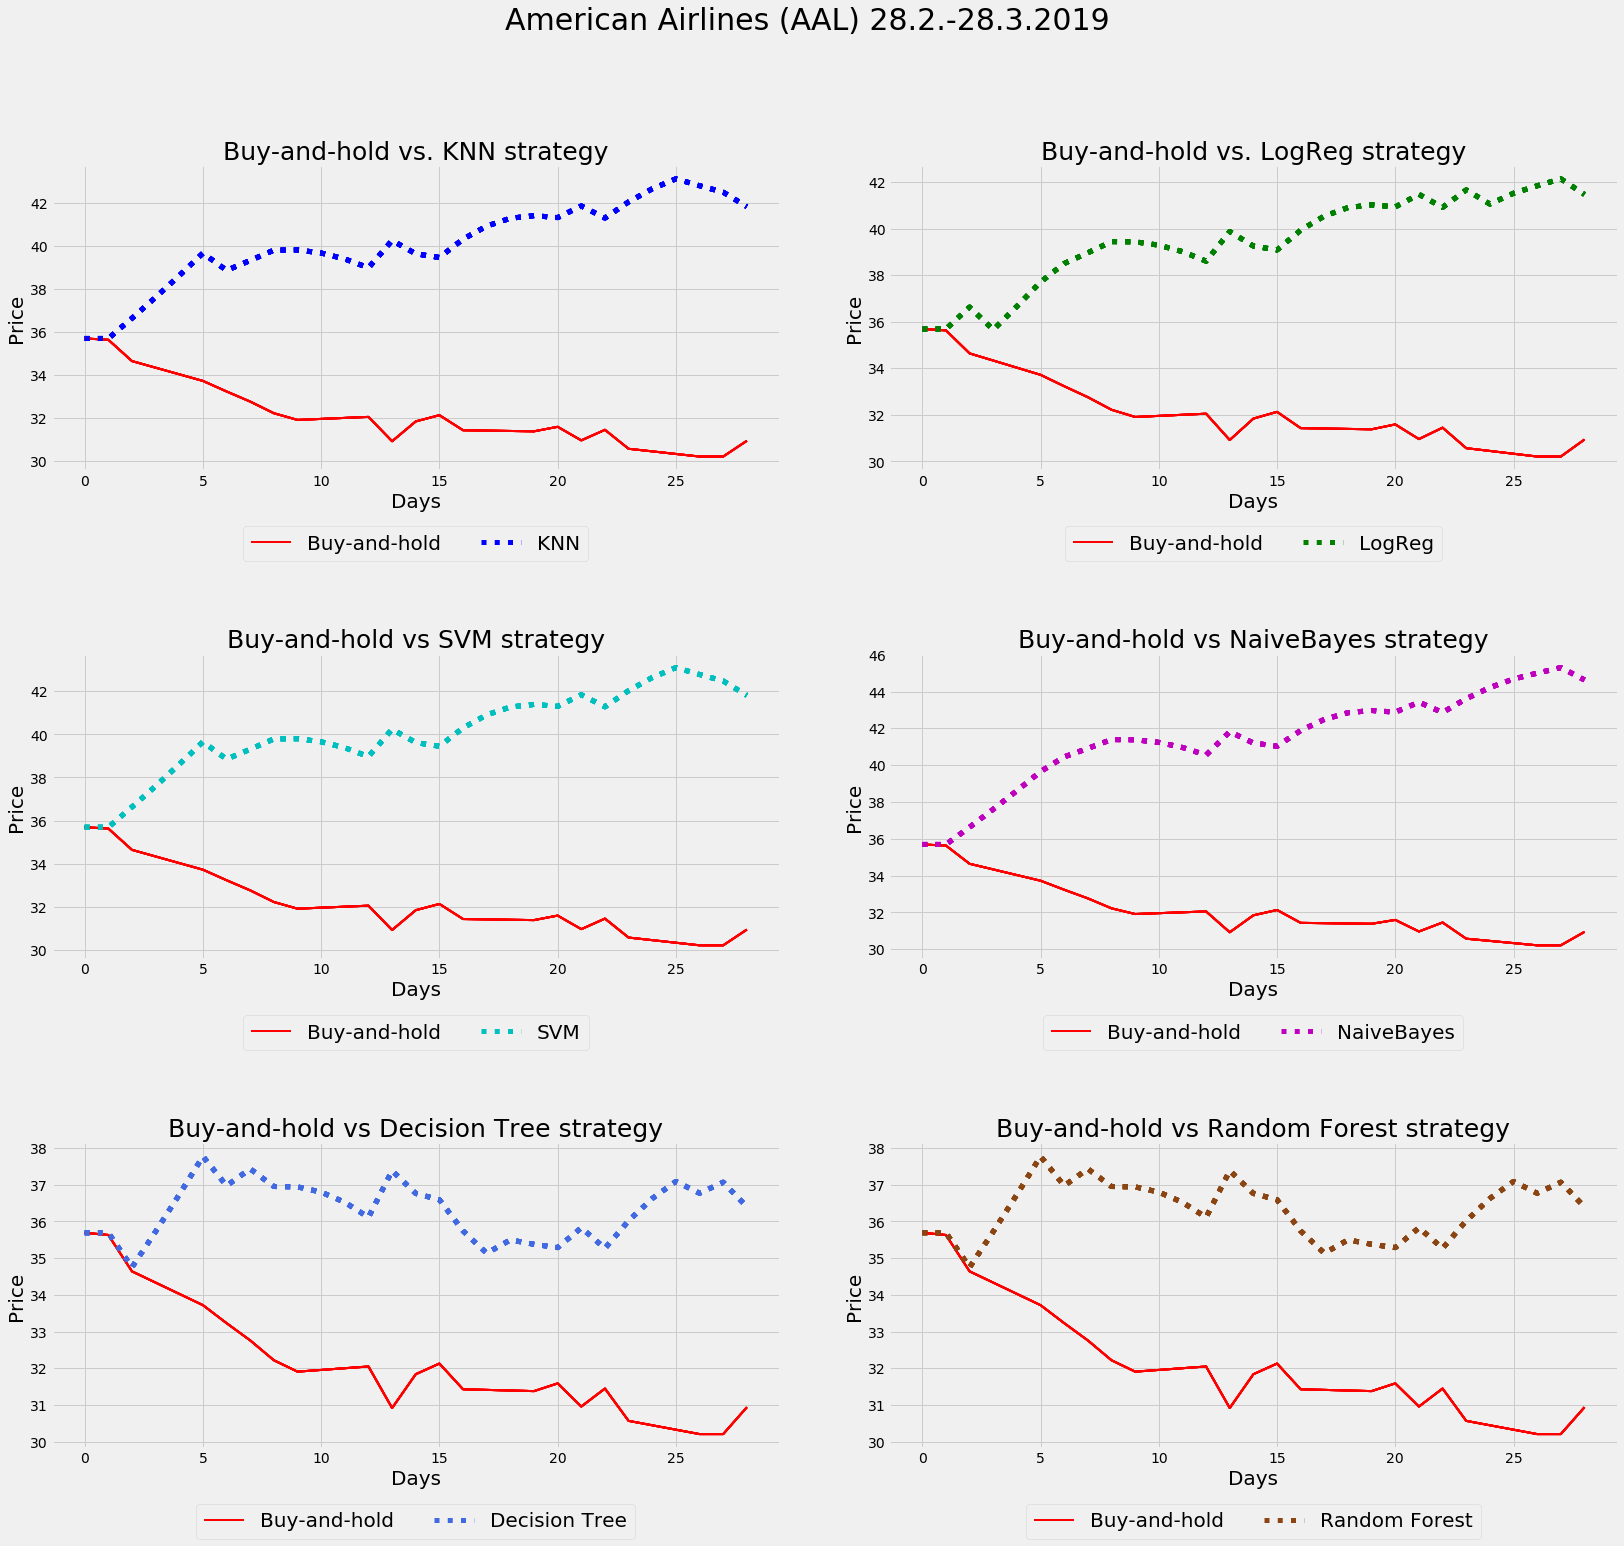

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
plt.style.use('fivethirtyeight') #ggplot or seaborn
plt.rcParams['figure.figsize'] = 25, 22 
plt.suptitle('American Airlines (AAL) 28.2.-28.3.2019', fontsize=30) #, verticalalignment='bottom'

ax1 = Spring2019['Adj Close']
ax2 = Spring2019['KNN_Result']
ax3 = Spring2019['LogReg_Result']
ax4 = Spring2019['SVM_Result']
ax5 = Spring2019['Naive_Bayes_Result']
ax6 = Spring2019['Decision_Tree_Result']
ax7 = Spring2019['Random_Forest_Result']

for i in range (1, 7):
    plt.subplots_adjust(hspace=0.6, wspace=0.15)
        
    plt.subplot(3,2,1)
    plt.plot(ax1, 'r',  linewidth=2)
    plt.plot(ax2,  'b',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs. KNN strategy', fontsize=25)
    a='Buy-and-hold'
    b='KNN'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,2)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax3, 'g',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs. LogReg strategy', fontsize=25)
    a='Buy-and-hold'
    b='LogReg'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,3)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax4, 'c',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs SVM strategy', fontsize=25)
    a='Buy-and-hold'
    b='SVM'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,4)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax5, 'm',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs NaiveBayes strategy', fontsize=25)
    a='Buy-and-hold'
    b='NaiveBayes'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,5)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax6, 'royalblue',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs Decision Tree strategy', fontsize=25)
    a='Buy-and-hold'
    b='Decision Tree'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)
    
    plt.subplot(3,2,6)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax7, 'saddlebrown',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Buy-and-hold vs Random Forest strategy', fontsize=25)
    a='Buy-and-hold'
    b='Random Forest'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

#pylab.savefig('AAL.jpg') # Saves figure as .jpg-file
plt.show()